<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/Semana06-model_selection_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Validación de Modelo**
### *Estimando* el error esperado de generalización usando validación cruzada.


1.   **data split**: división entrenamiento y prueba (training - test)
2.   **model definition**: definimos el modelo ML a ser usado
5.   **model validation**: Asumimos que tenemos los hyperparámetros óptimos y queremos estimar el error esperado de generalización

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC, SVR
from sklearn.metrics import SCORERS
from sklearn import datasets

**data split**: división entrenamiento y prueba (training - test)

In [ ]:
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(353, 10)

**model definition**: definimos el modelo ML a ser usado

In [ ]:
model = SVR(C = 1, kernel = 'rbf', gamma = 1)

#print(SCORERS)

**model validation**: Asumimos que tenemos los hyperparámetros óptimos y queremos estimar el error esperado de generalización

score cv =5,  RMSE 77.94171571821897 3.6461354754314903


(array([2., 1., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([74.60701114, 75.57705673, 76.54710232, 77.5171479 , 78.48719349,
        79.45723908, 80.42728467, 81.39733026, 82.36737585, 83.33742144,
        84.30746703]),
 <BarContainer object of 10 artists>)

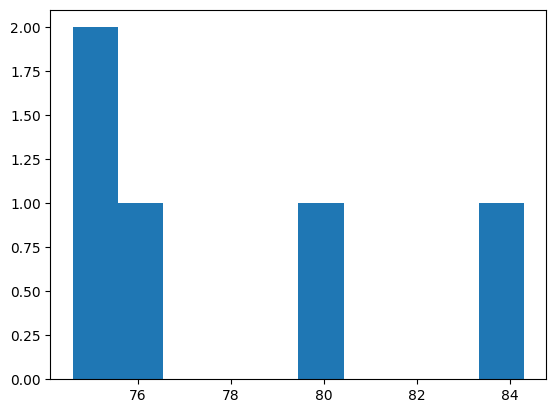

In [ ]:
# crossvalidation score (error esperado de generalización)
import matplotlib.pyplot as plt
import numpy as np

scores_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error') #np.mean(np.sum(np.square(y_pred - y_test)))
print("score cv =5,  RMSE", -scores_cv.mean(), scores_cv.std())
plt.hist(-scores_cv)

In [ ]:
scores_cv

array([-74.72753739, -76.53649091, -79.53007213, -74.60701114,
       -84.30746703])

## Ejercício
* cuales son los scores para cv=2,10?

* mudar metrica para MSE

* cuales son los scores para leave-one-out ? — Hint usar `from sklearn.model_selection import LeaveOneOut
`

* que tan similar es el error de validacion cruzada con el error de predicción?

In [ ]:
scores_cv = cross_val_score(model, X_train, y_train, cv=2, scoring='neg_root_mean_squared_error') #np.mean(np.sum(np.square(y_pred - y_test)))
print("scores cv = 2",scores_cv )
scores_cv = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error') #np.mean(np.sum(np.square(y_pred - y_test)))
print("scores cv = 10",scores_cv )


scores cv = 2 [-76.35507816 -80.11910349]
scores cv = 10 [-72.43177941 -78.44763341 -70.15940152 -80.36841547 -79.61509079
 -78.47518652 -74.30640041 -75.00348875 -81.57661015 -86.68772959]


In [ ]:
scores_cv = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error') #np.mean(np.sum(np.square(y_pred - y_test)))
print("scores cv = 10, métrica MSE",scores_cv )


scores cv = 10, métrica MSE [-5246.36266822 -6154.03118759 -4922.34162147 -6459.08220528
 -6338.562682   -6158.3548987  -5521.44114139 -5625.52332533
 -6654.74332419 -7514.76246138]


score cv = leave-one-out,  RMSE 65.56961743907887 42.03717553463448


(array([53., 56., 64., 71., 46., 24., 21.,  9.,  5.,  4.]),
 array([  0.46427286,  20.84565453,  41.22703619,  61.60841786,
         81.98979952, 102.37118119, 122.75256286, 143.13394452,
        163.51532619, 183.89670785, 204.27808952]),
 <BarContainer object of 10 artists>)

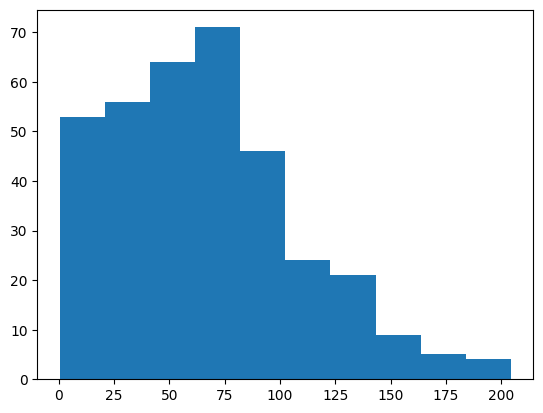

In [ ]:
#scores_cv = cross_val_score(model, X_train, y_train, cv=353, scoring='neg_mean_squared_error') #np.mean(np.sum(np.square(y_pred - y_test)))
# otra manera mejor es usar LeaveOneOut

from sklearn.model_selection import LeaveOneOut
scores_cv = cross_val_score(model, X_train, y_train, cv=LeaveOneOut(), scoring='neg_root_mean_squared_error') #np.mean(np.sum(np.square(y_pred - y_test)))
print("score cv = leave-one-out,  RMSE", -scores_cv.mean(), scores_cv.std())
plt.hist(-scores_cv)


# **Validación de Modelo — usando Pipelines**
### *Estimando* el error esperado de generalización usando validación cruzada.


1.   **data split**: división entrenamiento y prueba (training - test)
2.   **model definition**: definimos el modelo ML a ser usado
5.   **model validation**: Asumimos que tenemos los hyperparámetros óptimos y queremos estimar el error esperado de generalización

**model definition**: definimos el modelo ML a ser usado

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#pipeline
model_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('svr', SVR(C = 1, kernel = 'rbf', gamma = 1))])

In [ ]:
from sklearn import set_config
set_config(display="diagram")
model_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=1, gamma=1))])

**model validation**: Asumimos que tenemos los hyperparámetros óptimos y queremos estimar el error esperado de generalización

In [ ]:
scores_cv = cross_val_score(model_pipeline, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error')
print("score cv =5,  RMSE", -scores_cv.mean(), scores_cv.std())

score cv =5,  RMSE 79.22892012279569 3.7989490760867475


# **Selección de modelo** con búsqueda en malla (Grid Search)
1.   **model definition**: definimos el modelo ML a ser usado
2.   **model selection**: escogiendo los hyperparámetros (la complejidad correcta) para optimizar la generalización
5.   **model validation**: **estimar** el error esperado de generalización

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy import stats

**model definition**: definimos el modelo ML a ser usado

In [ ]:
model_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('svr', SVR())])

**model selection**: escogiendo los hyperparámetros (la complejidad correcta) para optimizar la generalización




In [ ]:
grid_list = {"svr__C": [0.1, 10, 100, 1000],
             "svr__gamma": [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(model_pipeline, param_grid = grid_list, n_jobs = 4, cv = 3, scoring = 'neg_root_mean_squared_error')
grid_search


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=4,
             param_grid={'svr__C': [0.1, 10, 100, 1000],
                         'svr__gamma': [0.01, 0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=4,
             param_grid={'svr__C': [0.1, 10, 100, 1000],
                         'svr__gamma': [0.01, 0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [ ]:
#print("grid search :{} ".format(grid_search.cv_results_))

In [ ]:
import pandas as pd
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
8,"{'svr__C': 100, 'svr__gamma': 0.01}",1,-54.712233,1.415343
9,"{'svr__C': 100, 'svr__gamma': 0.1}",2,-55.230337,0.723016
12,"{'svr__C': 1000, 'svr__gamma': 0.01}",3,-55.524901,1.707098
5,"{'svr__C': 10, 'svr__gamma': 0.1}",4,-56.195177,2.396928
4,"{'svr__C': 10, 'svr__gamma': 0.01}",5,-59.575559,2.438131
13,"{'svr__C': 1000, 'svr__gamma': 0.1}",6,-69.739033,2.347836
14,"{'svr__C': 1000, 'svr__gamma': 1}",7,-71.252396,3.351955
10,"{'svr__C': 100, 'svr__gamma': 1}",8,-71.777424,3.223117
6,"{'svr__C': 10, 'svr__gamma': 1}",9,-78.146491,3.274768
15,"{'svr__C': 1000, 'svr__gamma': 10}",10,-78.283526,3.203802


## **model validation**:

* Cuáles fueron los hyperparámetros óptimos?
* Cuál fué el mejor cross_validation score? (error esperado de generalización)
* Cuál es error esperado de generalización reentrenando el modelo usando los parámetros óptimos?
* Cuál es el error de predicción en el conjunto de test?
* Cuál es el error de predicción en el conjunto de test?
 — reaprovechcar el refit del random search

In [ ]:
# Cuáles fueron los hyperparámetros óptimos?
grid_search.best_params_

{'svr__C': 100, 'svr__gamma': 0.01}

In [ ]:
#Cuál fué el mejor cross_validation score? (error esperado de generalización)
grid_search.best_score_*-1

54.712233058955185

In [ ]:
#Cuál es error esperado de generalización reentrenando el modelo usando los parámetros óptimos?
# (no es necesario hacer esto, por que gridSearchCV, tiene refit = True por default)
model_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('svr', SVR(C= 100, gamma = 0.01))])

model_pipeline.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
mean_squared_error(model_pipeline.predict(X_test), y_test, squared = False)

57.946106253347

In [ ]:
mean_squared_error(grid_search.predict(X_test), y_test, squared = False)

57.946106253347

# **Selección de modelo** con búsqueda en Aleatória (Random Search)
1.   **model definition**: definimos el modelo ML a ser usado
2.   **model selection**: escogiendo los hyperparámetros (la complejidad correcta) para optimizar la generalización
5.   **model validation**: estimar el error esperado de generalización

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV

**model definition**: definimos el modelo ML a ser usado

In [ ]:
model_pipeline = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

**model selection**: escogiendo los hyperparámetros (la complejidad correcta) para optimizar la generalización

In [ ]:
rand_list = {"svr__C": stats.uniform(0.01, 1000),
             "svr__gamma": stats.uniform(0.01 , 1000)}

rand_search = RandomizedSearchCV(model_pipeline, param_distributions = rand_list, n_iter = 300, n_jobs = 4, cv = 3, random_state = None, scoring = 'neg_root_mean_squared_error')
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=300, n_jobs=4,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ca7b2aca590>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ca7b2acaad0>},
                   scoring='neg_root_mean_squared_error')

In [ ]:
results_df = pd.DataFrame(rand_search.cv_results_).sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
14,"{'svr__C': 728.221436917826, 'svr__gamma': 0.3...",1,-64.632992,2.093642
282,"{'svr__C': 966.4539282675906, 'svr__gamma': 1....",2,-76.513297,3.099750
168,"{'svr__C': 269.06287231605023, 'svr__gamma': 2...",3,-77.800422,3.092452
137,"{'svr__C': 936.8263412404135, 'svr__gamma': 3....",4,-77.965504,3.102972
25,"{'svr__C': 679.9963507749848, 'svr__gamma': 3....",5,-78.053171,3.111944
...,...,...,...,...
287,"{'svr__C': 8.420985063362686, 'svr__gamma': 22...",296,-79.392256,3.486617
113,"{'svr__C': 24.341744009029934, 'svr__gamma': 8...",297,-79.394135,3.465723
150,"{'svr__C': 11.943288310019163, 'svr__gamma': 8...",298,-79.399636,3.492372
50,"{'svr__C': 13.270942817563293, 'svr__gamma': 5...",299,-79.400269,3.489625


## **model validation**:


* Cuáles fueron los hyperparámetros óptimos?
* Cuál fué el mejor cross_validation score? (error esperado de generalización)
* Cuál es error esperado de generalización reentrenando el modelo usando los parámetros óptimos?
* Cuál es el error de generalización en el conjunto de test?
* Cuál es el error de generalización en el conjunto de test?
 — reaprovechcar el refit del random search

## Ejercicio

Implementar: coarse - finer search. Experimentar con estragegia, grid-random. ( Otras estratégias son posibles: grid-grid, random-grid, random-random)

- caso: coarse grid search -> finer random search: usar `grid_search.best_params_` para identificar zonas mejores para aplicar random search

- que sucede con el error de validación cruzada vs el error de predicción en nuestro conjunto `X_test`?
